In [1]:
import tensorflow as tf
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.1.0'

In [3]:
train_data = pd.read_csv("cub-csci-4622-kaggle-2-2020/stock_XY_train.csv")

In [4]:
# Remove all data points that have nan in 65% or more of their features
train_data_clean = train_data
for label, row in train_data_clean.iterrows():
    if( row.isna().sum()/len(train_data_clean.columns) >= .65 ):
        train_data_clean.drop(label, inplace=True)

In [5]:
# Drop columns/features that are 10% or more nans for the data
cols_to_drop = []
for itrr, v in enumerate(train_data_clean.isna().sum()):
    if (v/len(train_data_clean) >= .1):
        cols_to_drop.append(train_data_clean.columns[itrr])

In [6]:
# add on other unwanted columns
cols_to_drop.append('Ticker')
cols_to_drop.append('Yr')
cols_to_drop.append('Unnamed: 0')
cols_to_drop.append('Sector')
cols_to_drop.append('operatingProfitMargin')
train_data_clean = train_data.drop(cols_to_drop, axis=1)

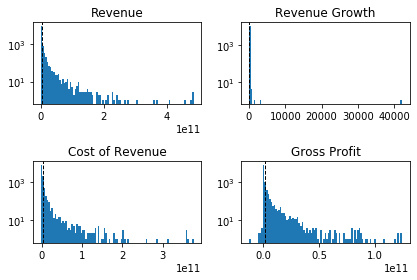

In [7]:
# looking at the distibutions of each feature to see if the mean is a good value to use to impute with
for num, col in enumerate(train_data_clean.columns[0:4]):
    plt.subplot(2, 2, num+1)
    plt.tight_layout()
    plt.hist(x=train_data_clean[col],bins=np.linspace(train_data_clean[col].min(),train_data_clean[col].max(),100),log=True)
    plt.axvline(train_data_clean[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(col)


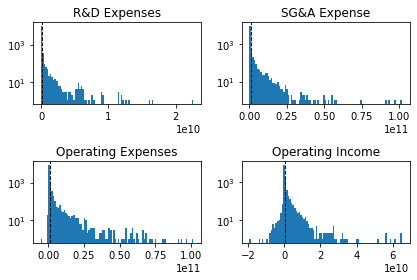

In [8]:
# looking at the distibutions of each feature to see if the mean is a good value to use to impute with
for num, col in enumerate(train_data_clean.columns[4:8]):
    plt.subplot(2, 2, num+1)
    plt.tight_layout()
    plt.hist(x=train_data_clean[col],bins=np.linspace(train_data_clean[col].min(),train_data_clean[col].max(),100),log=True)
    plt.axvline(train_data_clean[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(col)


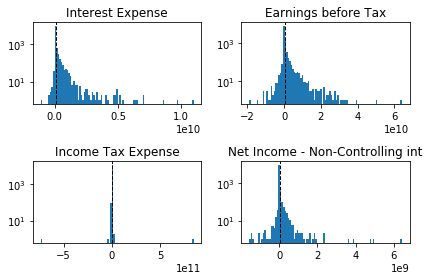

In [9]:
# looking at the distibutions of each feature to see if the mean is a good value to use to impute with
for num, col in enumerate(train_data_clean.columns[8:12]):
    plt.subplot(2, 2, num+1)
    plt.tight_layout()
    plt.hist(x=train_data_clean[col],bins=np.linspace(train_data_clean[col].min(),train_data_clean[col].max(),100),log=True)
    plt.axvline(train_data_clean[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(col)


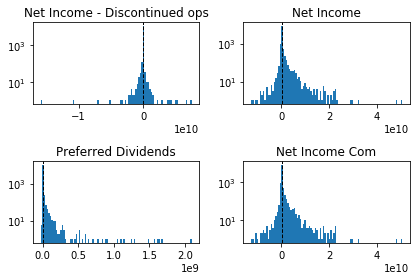

In [10]:
# looking at the distibutions of each feature to see if the mean is a good value to use to impute with
for num, col in enumerate(train_data_clean.columns[12:16]):
    plt.subplot(2, 2, num+1)
    plt.tight_layout()
    plt.hist(x=train_data_clean[col],bins=np.linspace(train_data_clean[col].min(),train_data_clean[col].max(),100),log=True)
    plt.axvline(train_data_clean[col].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(col)


In [11]:
train_data_norm = train_data_clean.drop(['Buy'],axis=1)
train_data_norm.shape

(10999, 167)

In [12]:
train_data_Y = train_data_clean['Buy']
train_data_Y.shape

(10999,)

In [13]:
# mean and standard dev for normalization
train_col_means = []
train_col_stds = []
for col in train_data_norm.columns:
    train_col_means.append(train_data_norm[col].mean())
    train_col_stds.append(train_data_norm[col].std())

In [14]:
# Normalize the data before imputation
for itrr, col in enumerate(train_data_norm.columns):
    train_data_norm[col] = train_data_norm[col].map(lambda x: ((x - train_col_means[itrr])/train_col_stds[itrr]))

In [15]:
# Impute the data with mean
train_data_filled = train_data_norm
for itrr, col in enumerate(train_data_filled.columns):
    train_data_filled[col].fillna(train_data_filled[col].mean(), inplace=True)

In [16]:
train_data_X = train_data_filled
train_data_X

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Operating Cash Flow growth,Free Cash Flow growth,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,-0.238275,-0.013077,-0.195814,-0.262142,-0.138355,-0.227694,-0.250633,-0.216414,-0.241367,-0.215679,...,-0.030861,-0.025186,-9.320004e-18,-0.021331,-0.037057,0.001016,-0.019409,-0.035642,0.084063,0.008320
1,0.682190,-0.011862,0.608197,0.653963,-0.139891,-0.230521,0.124493,1.523082,2.071077,1.137016,...,-0.005615,-0.009072,7.243129e-02,-0.016296,-0.110634,-0.049015,-0.013263,-0.034587,-0.024523,-0.066718
2,-0.220907,-0.011557,-0.182648,-0.240604,-0.058078,-0.204404,-0.220581,-0.217629,-0.241758,-0.215771,...,0.001846,-0.001991,-6.301912e-02,-0.016796,-0.054561,-0.064018,-0.013851,-0.037013,-0.029902,-0.104726
3,-0.236711,-0.012140,-0.195979,-0.257336,-0.139891,-0.225134,-0.248960,-0.206705,-0.241758,-0.204311,...,-0.006277,-0.009967,-6.301912e-02,-0.016796,-0.054561,-0.053190,-0.013371,-0.036841,-0.024523,-0.035612
4,-0.083050,-0.011985,-0.080776,-0.064088,0.256764,-0.072633,-0.089359,0.000636,-0.094985,0.024027,...,-0.002890,-0.006736,6.131073e-01,-0.016628,-0.040895,-0.049311,-0.013288,-0.031638,-0.021538,-0.033234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,-0.230946,-0.009705,-0.194798,-0.243431,0.026740,-0.195980,-0.207424,-0.251387,-0.155626,-0.274522,...,-0.001238,-0.005427,-6.301912e-02,-0.008905,-0.446137,0.029146,-0.013276,-0.015669,-0.020652,-0.054318
12373,0.497244,-0.012828,0.586908,0.172560,-0.139891,0.255950,0.417029,-0.362159,0.043538,-0.475379,...,-0.011029,-0.013240,2.016764e+00,-0.019189,-0.099279,-0.080037,-0.015045,-0.031747,-0.024523,-0.100012
12376,0.215987,-0.011974,0.173479,0.248261,-0.139891,0.040596,0.142224,0.388090,0.768965,0.324950,...,-0.003856,-0.007546,2.532820e-01,-0.016548,-0.054561,-0.055539,-0.013400,-0.034534,-0.024523,-0.051876
12377,-0.230177,-0.012061,-0.195979,-0.238734,0.080198,-0.222444,-0.219272,-0.215158,-0.215031,-0.218325,...,0.019740,0.010326,-6.301912e-02,-0.016796,-0.054561,0.001510,-0.013350,-0.035642,0.000777,-0.056314


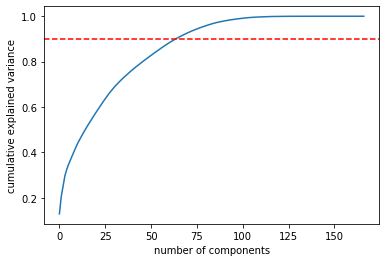

In [17]:
# still have a lot of features in our model so we look at PCA to reduce them more
# making sure to maintain 90% varience 
pca = PCA(n_components=train_data_X.shape[1])
train_data_X_redu = pca.fit(train_data_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y=0.90,c='r',ls='--')

In [18]:
# reduce to the feature space but maintain the varience
pca = PCA(n_components=60)
train_data_X_redu = pca.fit_transform(train_data_X)
input_shape = train_data_X_redu.shape
input_shape

(10999, 60)

In [19]:
# buy or sell as labels
train_labels  = tf.keras.utils.to_categorical(train_data_Y, 2)
train_labels.shape

(10999, 2)

In [20]:
print(train_labels[0],train_labels[1])

[1. 0.] [0. 1.]


In [21]:
# NN with PCA 
model_pca = tf.keras.Sequential()
model_pca.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(input_shape[1],)))
model_pca.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [22]:
# Method used Stochastic gradient descent with inital learning rate of .1
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [23]:
# the metric to track is binary_crossentropy
model_pca.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','binary_crossentropy'])

model_pca.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7808      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 8,066
Trainable params: 8,066
Non-trainable params: 0
_________________________________________________________________


In [24]:
# fit
model_pca.fit(train_data_X_redu, train_labels, epochs=15)

Train on 10999 samples
Epoch 1/15
10999/10999 [==============================] - 1s 118us/sample - loss: 0.7601 - accuracy: 0.5323 - binary_crossentropy: 0.7515
Epoch 2/15
10999/10999 [==============================] - 1s 73us/sample - loss: 0.7260 - accuracy: 0.5341 - binary_crossentropy: 0.7217
Epoch 3/15
10999/10999 [==============================] - 1s 73us/sample - loss: 0.7099 - accuracy: 0.5512 - binary_crossentropy: 0.7073
Epoch 4/15
10999/10999 [==============================] - 1s 74us/sample - loss: 0.7080 - accuracy: 0.5414 - binary_crossentropy: 0.7077
Epoch 5/15
10999/10999 [==============================] - 1s 71us/sample - loss: 0.7043 - accuracy: 0.5590 - binary_crossentropy: 0.7042
Epoch 6/15
10999/10999 [==============================] - 1s 74us/sample - loss: 0.6932 - accuracy: 0.5623 - binary_crossentropy: 0.6925
Epoch 7/15
10999/10999 [==============================] - 1s 72us/sample - loss: 0.6981 - accuracy: 0.5596 - binary_crossentropy: 0.6975
Epoch 8/15
10999/

In [25]:
# NN with out PCA 
model_no_pca = tf.keras.Sequential()
model_no_pca.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(train_data_X.shape[1],)))
model_no_pca.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

In [26]:
# the metric to track is binary_crossentropy
model_no_pca.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy','binary_crossentropy'])

model_no_pca.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               21504     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 21,762
Trainable params: 21,762
Non-trainable params: 0
_________________________________________________________________


In [27]:
# fit
model_no_pca.fit(train_data_X, train_labels, epochs=15)

Train on 10999 samples
Epoch 1/15
10999/10999 [==============================] - 1s 102us/sample - loss: 0.7529 - accuracy: 0.5336 - binary_crossentropy: 0.7458
Epoch 2/15
10999/10999 [==============================] - 1s 76us/sample - loss: 0.7148 - accuracy: 0.5460 - binary_crossentropy: 0.7145
Epoch 3/15
10999/10999 [==============================] - 1s 80us/sample - loss: 0.6967 - accuracy: 0.5581 - binary_crossentropy: 0.6967
Epoch 4/15
10999/10999 [==============================] - 1s 115us/sample - loss: 0.6931 - accuracy: 0.5601 - binary_crossentropy: 0.6931
Epoch 5/15
10999/10999 [==============================] - 1s 96us/sample - loss: 0.6899 - accuracy: 0.5707 - binary_crossentropy: 0.6899
Epoch 6/15
10999/10999 [==============================] - 1s 118us/sample - loss: 0.6829 - accuracy: 0.5672 - binary_crossentropy: 0.6829
Epoch 7/15
10999/10999 [==============================] - 1s 119us/sample - loss: 0.6830 - accuracy: 0.5761 - binary_crossentropy: 0.6826
Epoch 8/15
109

In [28]:
# test data
test_data = pd.read_csv("cub-csci-4622-kaggle-2-2020/stock_X_test.csv")
test_data

,Unnamed: 0,Unnamed: 0.1,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Yr
0,0,17685,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,...,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,18
1,1,17686,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,...,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,18
2,2,17687,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,...,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,18
3,3,17688,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,...,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,18
4,4,17689,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,...,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,5301,724,CALA,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.636700e+07,5.354000e+06,2.172100e+07,...,NaN,0.0000,0.0000,2.0068,1.0974,0.0000,0.6532,1.1606,Healthcare,14
9694,5302,11358,PMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Services,16
9695,5303,10307,LSI,4.626080e+08,0.2619,1.512640e+08,3.113440e+08,0.000000e+00,4.310300e+07,1.762390e+08,...,0.2117,-0.1347,0.0000,0.8208,0.3541,0.9979,0.0000,0.1150,Real Estate,16
9696,5304,14928,PPIH,9.884500e+07,-0.1944,8.712900e+07,1.171600e+07,0.000000e+00,2.330000e+07,2.330000e+07,...,0.0000,-0.1346,-0.1318,-0.2642,-0.1633,-0.2420,0.0000,-0.0236,Industrials,17


In [29]:
# drop same columns as train data
cols_to_drop.append('Unnamed: 0.1')
test_data_X = test_data.drop(cols_to_drop, axis=1)
test_data_X

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Operating Cash Flow growth,Free Cash Flow growth,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.1428,0.2462,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0961,0.3841,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.3312,0.3793,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,1.1342,1.4922,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2961,-0.8162,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.636700e+07,5.354000e+06,2.172100e+07,-2.172100e+07,0.000000e+00,-2.171200e+07,...,-0.6247,-0.6488,NaN,0.0000,0.0000,2.0068,1.0974,0.0000,0.6532,1.1606
9694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9695,4.626080e+08,0.2619,1.512640e+08,3.113440e+08,0.000000e+00,4.310300e+07,1.762390e+08,1.351050e+08,4.717500e+07,8.522500e+07,...,0.2126,-10.9372,0.2117,-0.1347,0.0000,0.8208,0.3541,0.9979,0.0000,0.1150
9696,9.884500e+07,-0.1944,8.712900e+07,1.171600e+07,0.000000e+00,2.330000e+07,2.330000e+07,-1.158400e+07,5.690000e+05,-1.308500e+07,...,-0.8837,0.5397,0.0000,-0.1346,-0.1318,-0.2642,-0.1633,-0.2420,0.0000,-0.0236


In [30]:
# Normalize the same as the train data
for itrr, col in enumerate(test_data_X.columns):
    test_data_X[col] = test_data_X[col].map(lambda x: ((x - train_col_means[itrr])/train_col_stds[itrr]))
test_data_X

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Operating Cash Flow growth,Free Cash Flow growth,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,4.472832,-0.011786,-0.195979,13.150580,-0.139891,17.645901,14.392989,7.101475,9.569095,6.559307,...,-0.003310,-0.005956,0.817971,-0.014969,-0.054561,-0.023896,-0.012850,-0.023513,-0.024523,-0.038945
1,0.466686,-0.011982,0.291936,0.710874,-0.139891,-0.064779,0.341179,1.247606,5.068068,0.773230,...,-0.003879,-0.004680,-1.107976,-0.016551,-0.090586,-0.057948,-0.013571,-0.035870,-0.024523,-0.093578
2,3.293416,-0.011743,1.619041,5.945142,20.611984,1.630975,3.708640,8.758564,-0.590760,10.235694,...,-0.001013,-0.004725,0.226642,-0.015382,-0.039407,-0.053941,-0.012524,-0.035923,-0.022280,-0.086720
3,1.276609,-0.010840,0.640868,2.276996,3.140754,-0.006314,0.309171,5.556731,0.705535,6.197313,...,0.008777,0.005572,-0.063019,-0.013545,0.004607,-0.035256,-0.006516,-0.045336,-0.014525,-0.046717
4,5.824183,-0.011991,6.194920,3.449707,-0.139891,4.764078,7.644683,-5.812817,13.770976,-9.964723,...,-0.008661,-0.015786,-1.045691,-0.018773,-0.167805,-0.073256,-0.018665,-0.039454,-0.024523,-0.060179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,-0.238402,-0.012061,-0.195979,-0.262151,-0.114811,-0.229044,-0.248602,-0.220467,-0.241758,-0.220331,...,-0.012667,-0.014237,NaN,-0.016796,-0.054561,0.140362,-0.001404,-0.035642,0.013053,0.179714
9694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9695,-0.215341,-0.011416,-0.185852,-0.217964,-0.139891,-0.218634,-0.218628,-0.160129,-0.111089,-0.172422,...,-0.002459,-0.109427,0.731298,-0.017754,-0.054561,0.023303,-0.009702,-0.019081,-0.024523,-0.042300
9696,-0.233474,-0.012540,-0.190146,-0.260488,-0.139891,-0.224095,-0.248296,-0.216566,-0.240182,-0.216466,...,-0.015824,-0.003241,-0.063019,-0.017753,-0.106170,-0.083788,-0.015479,-0.039659,-0.024523,-0.071729


In [31]:
test_data_X.shape

(9698, 167)

In [32]:
# fill nan with the mean of the train combined with the test data 
test_train_combined = pd.concat([train_data_norm, test_data_X])
for c in test_data_X.columns:
    test_data_X[c].fillna(test_train_combined[c].mean(), inplace=True)
test_data_X.shape

(9698, 167)

In [33]:
test_data_X

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Operating Cash Flow growth,Free Cash Flow growth,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,4.472832,-0.011786,-0.195979,13.150580,-0.139891,17.645901,14.392989,7.101475,9.569095,6.559307,...,-0.003310,-0.005956,0.817971,-0.014969,-0.054561,-0.023896,-0.012850,-0.023513,-0.024523,-0.038945
1,0.466686,-0.011982,0.291936,0.710874,-0.139891,-0.064779,0.341179,1.247606,5.068068,0.773230,...,-0.003879,-0.004680,-1.107976,-0.016551,-0.090586,-0.057948,-0.013571,-0.035870,-0.024523,-0.093578
2,3.293416,-0.011743,1.619041,5.945142,20.611984,1.630975,3.708640,8.758564,-0.590760,10.235694,...,-0.001013,-0.004725,0.226642,-0.015382,-0.039407,-0.053941,-0.012524,-0.035923,-0.022280,-0.086720
3,1.276609,-0.010840,0.640868,2.276996,3.140754,-0.006314,0.309171,5.556731,0.705535,6.197313,...,0.008777,0.005572,-0.063019,-0.013545,0.004607,-0.035256,-0.006516,-0.045336,-0.014525,-0.046717
4,5.824183,-0.011991,6.194920,3.449707,-0.139891,4.764078,7.644683,-5.812817,13.770976,-9.964723,...,-0.008661,-0.015786,-1.045691,-0.018773,-0.167805,-0.073256,-0.018665,-0.039454,-0.024523,-0.060179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,-0.238402,-0.012061,-0.195979,-0.262151,-0.114811,-0.229044,-0.248602,-0.220467,-0.241758,-0.220331,...,-0.012667,-0.014237,-0.015925,-0.016796,-0.054561,0.140362,-0.001404,-0.035642,0.013053,0.179714
9694,0.013199,-0.003137,0.014140,0.012501,0.015793,0.005721,0.007818,0.009100,0.015649,0.008010,...,0.760156,-0.040667,-0.015925,0.052549,0.007671,0.053798,-0.004800,0.025969,-0.007446,0.010746
9695,-0.215341,-0.011416,-0.185852,-0.217964,-0.139891,-0.218634,-0.218628,-0.160129,-0.111089,-0.172422,...,-0.002459,-0.109427,0.731298,-0.017754,-0.054561,0.023303,-0.009702,-0.019081,-0.024523,-0.042300
9696,-0.233474,-0.012540,-0.190146,-0.260488,-0.139891,-0.224095,-0.248296,-0.216566,-0.240182,-0.216466,...,-0.015824,-0.003241,-0.063019,-0.017753,-0.106170,-0.083788,-0.015479,-0.039659,-0.024523,-0.071729


In [34]:
# PCA reduces the data too much and loses important data
# trasnform into the same feature space that the train data was
#test_data_X_redu = pca.transform(test_data_X)

In [35]:
test_data_X.shape

(9698, 167)

In [36]:
# calc the probablitie of sell vs buy
pred_y = model_no_pca.predict(test_data_X)

In [37]:
pred_y

array([[0.01557756, 0.98442245],
       [0.48123518, 0.51876485],
       [0.42604843, 0.5739516 ],
       ...,
       [0.56322384, 0.43677616],
       [0.60128176, 0.3987183 ],
       [0.46883756, 0.5311625 ]], dtype=float32)

In [38]:
pred_y.shape

(9698, 2)

In [39]:
# choose the cutoff point to be .5
pred_bin = []
for p in pred_y:
    if(p[0] >= .5):
        pred_bin.append(0)
    else:
        pred_bin.append(1)

In [40]:
pred_df = pd.DataFrame({'Unnamed: 0':test_data['Unnamed: 0.1'],'Buy':pred_bin})
pred_df.head()

,Unnamed: 0,Buy
0,17685,1
1,17686,1
2,17687,1
3,17688,0
4,17689,0


In [41]:
pred_df.to_csv("test_output.csv",index=False)